## Analyzing Nominal Wages and Real Wages

### Importing libraries

In [4]:
# Data management
# ==============================================================================
import pandas as pd
import numpy as np

# Visualization
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('seaborn')
import seaborn as sns

# Addittional settings
# ==============================================================================
#Option to display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

### Slicing and Reshaping Data

The data used in this notebook can be downloaded from [stats.oecd.org](https://stats.oecd.org/viewhtml.aspx?datasetcode=RMW&lang=en), and can also be found in the data folder of this project.

In [5]:
# Reading minimum real wages from csv file
wages = pd.read_csv('data/real_minimum_wages.csv',sep=',')
wages.head()  # Show first 5 rows

,COUNTRY,Country,SERIES,Series,PERIOD,Pay period,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,IRL,Ireland,PPP,In 2020 constant prices at 2020 USD PPPs,A,Annual,2001,2001,USD,US Dollar,0,Units,NaN,NaN,"15,596.64",NaN,NaN
1,IRL,Ireland,PPP,In 2020 constant prices at 2020 USD PPPs,A,Annual,2002,2002,USD,US Dollar,0,Units,NaN,NaN,"15,656.66",NaN,NaN
2,IRL,Ireland,PPP,In 2020 constant prices at 2020 USD PPPs,A,Annual,2003,2003,USD,US Dollar,0,Units,NaN,NaN,"15,826.46",NaN,NaN
3,IRL,Ireland,PPP,In 2020 constant prices at 2020 USD PPPs,A,Annual,2004,2004,USD,US Dollar,0,Units,NaN,NaN,"16,949.05",NaN,NaN
4,IRL,Ireland,PPP,In 2020 constant prices at 2020 USD PPPs,A,Annual,2005,2005,USD,US Dollar,0,Units,NaN,NaN,"17,689.83",NaN,NaN


In [6]:
wages.shape

(2504, 17)

The data is currently in long format, which is difficult to analyze when there are several dimensions to the data. We will use `pivot_table` to create a wide format panel, with a MultiIndex to handle higher dimensional data.

Pivot_table arguments should specify the data (values), the index, and the columns we want in our resulting dataframe. By passing a list in columns, we can create a MultiIndex in our column axis.

While reviewing the data stored in the last 2 columns of the dataset, we note that is full of _nan_ values, as well as _Reference Period Code_ and _Reference Period_ so we will remove them from the DataFrame. There are also some repeated columns in the source dataset, and some others that we will rename it, in order to facilitate the analysis.

In [5]:
wages=wages.drop(["Flag Codes","Flags","Reference Period Code","Reference Period","TIME"], axis=1)
wages

,COUNTRY,Country,SERIES,Series,PERIOD,Pay period,Time,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,IRL,Ireland,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2001,USD,US Dollar,0,Units,"15,560.45"
1,IRL,Ireland,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2002,USD,US Dollar,0,Units,"15,620.33"
2,IRL,Ireland,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2003,USD,US Dollar,0,Units,"15,789.73"
3,IRL,Ireland,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2004,USD,US Dollar,0,Units,"16,909.72"
4,IRL,Ireland,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2005,USD,US Dollar,0,Units,"17,648.78"
...,...,...,...,...,...,...,...,...,...,...,...,...
2239,CRI,Costa Rica,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2014,USD,US Dollar,0,Units,"8,500.49"
2240,CRI,Costa Rica,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2015,USD,US Dollar,0,Units,"9,007.52"
2241,CRI,Costa Rica,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2016,USD,US Dollar,0,Units,"9,261.85"
2242,CRI,Costa Rica,PPP,In 2018 constant prices at 2018 USD PPPs,A,Annual,2017,USD,US Dollar,0,Units,"9,113.68"


In [6]:
realwage = wages.pivot_table(values='Value',
                             index='Time',
                             columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2018 constant prices at 2018 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2001                                      20,664.37  10.46   
2002                                      20,867.94  10.56   
2003                                      21,140.22  10.70   
2004                                      21,511.26  10.89   
2005                                      21,685.68  10.97   

Country                                                               \
Series     In 2018 constant prices at 2018 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2001                                                23,676.68  11.98   
2002                                                23,909.92  12.10   
2003                                                24,221.90  12.26   
2004                                                24,647.03  12.47   
2005                                                24,846.88  12.57   

Country                                     Belgium         \
Series     In 2018 constant prices at 2018 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2001                                      21,651.25  10.38   
2002                                      21,941.49  10.52   
2003                                      21,814.56  10.46   
2004                                      21,578.26  10.35   
2005                                      21,413.56  10.27   

Country                                                               \
Series     In 2018 constant prices at 2018 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2001                                                22,130.19  10.61   
2002                                                22,426.86  10.75   
2003                                                22,297.12  10.69   
2004                                                22,055.59  10.57   
2005                                                21,887.25  10.49   

Country                                      Brazil         \
Series     In 2018 constant prices at 2018 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2001                                       2,662.76   1.13   
2002                                       2,771.52   1.18   
2003                                       2,849.65   1.21   
2004                                       2,944.49   1.25   
2005                                       3,117.75   1.33   

Country                                                               \
Series     In 2018 constant prices at 2018 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2001                                                 1,631.28   0.70   
2002                                                 1,697.91   0.72   
2003                                                 1,745.78   0.74   
2004                                                 1,803.88   0.77   
2005                                                 1,910.02   0.81   

Country                                      Canada         \
Series     In 2018 constant prices at 2018 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2001                                      14,205.31   6.83   
2002                                      14,055.98   6.76   
2003

The columns contain multiple levels of indexing, known as a `MultiIndex`, with levels being ordered hierarchically (Country > Series > Pay period).

A _MultiIndex_ is the simplest and most flexible way to manage panel data in pandas.

Now let's check the object type we are storing in pandas our _realwage_ **panel**, and see which are the columns.

In [7]:
type(realwage.columns)

pandas.core.indexes.multi.MultiIndex

In [8]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

We are able to select the country (the top level of our MultiIndex), for example, let's select 'Spain', and let's display all the years to be analyzed in our dataset.

In [9]:
realwage['Spain'].head(18)

Series     In 2018 constant prices at 2018 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2001                                      11,791.88   5.65   
2002                                      11,672.12   5.60   
2003                                      11,558.40   5.54   
2004                                      11,448.69   5.49   
2005                                      12,071.33   5.79   
2006                                      12,567.54   6.03   
2007                                      12,898.13   6.18   
2008                                      13,031.57   6.25   
2009                                      13,591.98   6.52   
2010                                      13,550.66   6.50   
2011                                      13,298.92   6.38   
2012                                      12,981.40   6.22   
2013                                      12,878.92   6.17   
2014                                      12,898.38   6.18   
2015                                      13,029.55   6.25   
2016                                      13,186.45   6.32   
2017                                      13,972.36   6.70   
2018                                      14,289.76   6.85   

Series     In 2018 constant prices at 2018 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2001                                                10,035.21   4.81  
2002                                                 9,933.29   4.76  
2003                                                 9,836.51   4.72  
2004                                                 9,743.14   4.67  
2005                                                10,273.03   4.93  
2006                                                10,695.31   5.13  
2007                                                10,976.65   5.26  
2008                                                11,090.22   5.32  
2009                                                11,567.14   5.55  
2010                                                11,531.97   5.53  
2011                                                11,317.74   5.43  
2012                                                11,047.52   5.30  
2013                                                10,960.31   5.25  
2014                                                10,976.87   5.26  
2015                                                11,088.50   5.32  
2016                                                11,222.02   5.38  
2017                                                11,890.85   5.70  
2018                                                12,160.97   5.83

`stacking` and `unstacking` levels of the MultiIndex may be used to reshape our dataframe into a format we need.

`.stack()` rotates the lowest level of the column MultiIndex to the row index, and `.unstack()` works in the opposite direction, like in examples shown below.

In [10]:
realwage.stack().head()

Country                                        Australia  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                    20,664.37   
     Hourly                                        10.46   
2002 Annual                                    20,867.94   
     Hourly                                        10.56   
2003 Annual                                    21,140.22   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                              23,676.68   
     Hourly                                                  11.98   
2002 Annual                                              23,909.92   
     Hourly                                                  12.10   
2003 Annual                                              24,221.90   

Country                                          Belgium  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                    21,651.25   
     Hourly                                        10.38   
2002 Annual                                    21,941.49   
     Hourly                                        10.52   
2003 Annual                                    21,814.56   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                              22,130.19   
     Hourly                                                  10.61   
2002 Annual                                              22,426.86   
     Hourly                                                  10.75   
2003 Annual                                              22,297.12   

Country                                           Brazil  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                     2,662.76   
     Hourly                                         1.13   
2002 Annual                                     2,771.52   
     Hourly                                         1.18   
2003 Annual                                     2,849.65   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                               1,631.28   
     Hourly                                                   0.70   
2002 Annual                                               1,697.91   
     Hourly                                                   0.72   
2003 Annual                                               1,745.78   

Country                                           Canada  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                    14,205.31   
     Hourly                                         6.83   
2002 Annual                                    14,055.98   
     Hourly                                         6.76   
2003 Annual                                    13,858.62   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                              14,802.12   
     Hourly                                                   7.12   
2002 Annual                                

In [11]:
realwage.unstack().head()

Country    Series                                    Pay period  Time
Australia  In 2018 constant prices at 2018 USD PPPs  Annual      2001   20,664.37
                                                                 2002   20,867.94
                                                                 2003   21,140.22
                                                                 2004   21,511.26
                                                                 2005   21,685.68
dtype: float64

We can also pass in an argument to select the level we would like to stack, in this case, let's stack at 'Country' level.


In [12]:
realwage.stack(level='Country').head()

Series         In 2018 constant prices at 2018 USD PPPs         \
Pay period                                       Annual Hourly   
Time Country                                                     
2001 Australia                                20,664.37  10.46   
     Belgium                                  21,651.25  10.38   
     Brazil                                    2,662.76   1.13   
     Canada                                   14,205.31   6.83   
     Chile                                     4,507.88   1.92   

Series         In 2018 constant prices at 2018 USD exchange rates         
Pay period                                                 Annual Hourly  
Time Country                                                              
2001 Australia                                          23,676.68  11.98  
     Belgium                                            22,130.19  10.61  
     Brazil                                              1,631.28   0.70  
     Canada                                             14,802.12   7.12  
     Chile                                               3,249.93   1.39

As for this exercise, we will choose to work with a dataframe of the hourly real minimum wages across countries and time, measured in 2018 US dollars.

To create our filtered dataframe `realwage_f`, we can use the `xs` method to select values at lower levels in the multiindex, while keeping the higher levels (countries in this case)

In [13]:
realwage_f = realwage.xs(('Hourly', 'In 2018 constant prices at 2018 USD PPPs'),
                         level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Estonia,France,Germany,Greece,Hungary,Ireland,Israel,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,10.46,10.38,1.13,6.83,1.92,2.11,2.81,2.95,1.60,9.65,NaN,5.46,2.78,7.48,5.35,6.37,3.08,1.08,2.19,10.35,0.91,10.17,6.78,3.19,4.46,0.25,1.49,4.81,5.65,2.90,6.72,7.30
2002,10.56,10.52,1.18,6.76,1.98,2.14,2.77,3.27,1.79,9.77,NaN,5.55,3.30,7.51,5.18,6.46,3.33,1.15,2.19,10.31,0.91,10.28,6.84,3.13,4.48,0.34,1.67,4.99,5.60,3.11,7.20,7.19
2003,10.70,10.46,1.21,6.66,2.00,2.15,2.79,3.55,2.06,9.94,NaN,5.63,3.15,7.59,5.25,6.48,3.51,1.31,2.26,10.70,0.91,10.38,7.10,3.28,4.45,0.37,1.99,5.16,5.54,3.31,7.36,7.03
2004,10.89,10.35,1.25,6.67,2.06,2.19,2.76,3.71,2.29,10.27,NaN,5.75,3.13,8.13,5.27,6.50,3.77,1.47,2.47,10.69,0.91,10.32,7.35,3.26,4.45,0.41,2.16,5.33,5.49,4.32,7.78,6.85
2005,10.97,10.27,1.33,6.73,2.10,2.22,2.78,3.91,2.39,10.67,NaN,5.86,3.25,8.48,5.20,6.55,4.10,1.43,2.63,10.90,0.91,10.15,7.54,3.29,4.47,0.45,2.30,5.46,5.79,4.50,8.14,6.62


### Merging Dataframes and Filling NaNs

Similar to relational databases like SQL, pandas has built in methods to merge datasets together.

Using country information from **WorldData.info**, we’ll add the continent of each country to realwage_f with the merge function.

The dataset can be accessed with the following link in GitHub:

In [14]:
url2 = 'https://raw.githubusercontent.com/fvgm-spec/csv_files/master/countries.csv'

In [15]:
worlddata = pd.read_csv(url2, sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),Country code,Continent,Capital,Population,Area,Coastline,Government form,Currency,Currency code,Dialing prefix,Birthrate,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,NaN,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.30,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,EG,Africa,NaN,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.30,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,AX,Europe,NaN,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.00,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,AL,Europe,NaN,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.10,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,NaN,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.00,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


First, we’ll select just the country and continent variables from worlddata and rename the column to ‘Country’

In [16]:
worlddata = worlddata[['Country (en)', 'Continent']]
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


We want to merge our new dataframe, _worlddata_, with _realwage_f_ that corresponds to the filtered Hourly wages per country of _realwage_ data.

The pandas merge function allows dataframes to be joined together by rows.

Our dataframes will be merged using country names, requiring us to use the transpose of realwage_f so that rows correspond to country names in both dataframes

In [17]:
realwage_f.transpose().head()

Time,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,
Australia,10.46,10.56,10.70,10.89,10.97,10.81,11.16,10.97,11.11,11.06,11.14,11.30,11.33,11.36,11.50,11.63,11.74,12.14
Belgium,10.38,10.52,10.46,10.35,10.27,10.29,10.40,10.36,10.88,10.64,10.59,10.50,10.70,10.66,10.60,10.50,10.49,10.38
Brazil,1.13,1.18,1.21,1.25,1.33,1.50,1.60,1.66,1.78,1.88,1.88,2.04,2.09,2.10,2.10,2.16,2.22,2.18
Canada,6.83,6.76,6.66,6.67,6.73,6.88,6.95,7.23,7.66,7.93,7.95,8.10,8.16,8.21,8.34,8.46,8.61,9.52
Chile,1.92,1.98,2.00,2.06,2.10,2.15,2.19,2.19,2.33,2.39,2.43,2.50,2.64,2.71,2.78,2.94,3.06,3.12


We can use either left, right, inner, or outer join to merge our datasets:

* left join includes only countries from the left dataset
* right join includes only countries from the right dataset
* outer join includes countries that are in either the left and right datasets
* inner join includes only countries common to both the left and right datasets

By default, merge will use an inner join.

Here we will pass how='left' to keep all countries in realwage_f, but discard countries in worlddata that do not have a corresponding data entry realwage_f.

We will also need to specify where the country name is located in each dataframe, which will be the key that is used to merge the dataframes `on`.

Our `left` dataframe (realwage_f.transpose()) contains countries in the index, so we set left_index=True.

Our `right` dataframe (worlddata) contains countries in the ‘Country’ column, so we set right_on='Country'

In [18]:
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')
merged.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country,Continent
17.00,10.46,10.56,10.70,10.89,10.97,10.81,11.16,10.97,11.11,11.06,11.14,11.30,11.33,11.36,11.50,11.63,11.74,12.14,Australia,Australia
23.00,10.38,10.52,10.46,10.35,10.27,10.29,10.40,10.36,10.88,10.64,10.59,10.50,10.70,10.66,10.60,10.50,10.49,10.38,Belgium,Europe
32.00,1.13,1.18,1.21,1.25,1.33,1.50,1.60,1.66,1.78,1.88,1.88,2.04,2.09,2.10,2.10,2.16,2.22,2.18,Brazil,South America
100.00,6.83,6.76,6.66,6.67,6.73,6.88,6.95,7.23,7.66,7.93,7.95,8.10,8.16,8.21,8.34,8.46,8.61,9.52,Canada,North America
38.00,1.92,1.98,2.00,2.06,2.10,2.15,2.19,2.19,2.33,2.39,2.43,2.50,2.64,2.71,2.78,2.94,3.06,3.12,Chile,South America


Countries that appeared in realwage_f but not in worlddata will have `NaN` in the Continent column.

To check whether this has occurred, we can use .isnull() on the continent column and filter the merged dataframe

In [19]:
merged[merged['Continent'].isnull()]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country,Continent
NaN,3.08,3.33,3.51,3.77,4.10,4.25,4.65,4.82,4.97,4.96,5.02,5.20,5.45,5.77,6.14,6.57,6.91,7.93,Korea,NaN
NaN,0.25,0.34,0.37,0.41,0.45,0.60,1.16,1.02,1.71,1.60,1.53,1.50,1.58,1.57,1.46,1.42,1.68,2.27,Russian Federation,NaN
NaN,1.49,1.67,1.99,2.16,2.30,2.47,2.70,2.82,3.10,3.23,3.33,3.43,3.43,3.43,3.43,3.43,3.43,3.43,Slovak Republic,NaN


As we have three missing values in our resulting dataset as they are identified as `nan` in the index,one option we have to deal with NaN values is to create a dictionary containing these countries and their respective continents.

`.map()` will match countries in merged ['Country'] with their continent from the dictionary.

Notice how countries not in our dictionary are mapped with NaN

In [20]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

merged['Country'].map(missing_continents)

17.00        NaN
23.00        NaN
32.00        NaN
100.00       NaN
38.00        NaN
108.00       NaN
41.00        NaN
225.00       NaN
53.00        NaN
58.00        NaN
45.00        NaN
68.00        NaN
233.00       NaN
86.00        NaN
88.00        NaN
91.00        NaN
NaN         Asia
117.00       NaN
122.00       NaN
123.00       NaN
138.00       NaN
153.00       NaN
151.00       NaN
174.00       NaN
175.00       NaN
NaN       Europe
NaN       Europe
198.00       NaN
200.00       NaN
227.00       NaN
241.00       NaN
240.00       NaN
Name: Country, dtype: object

We don’t want to overwrite the entire series with this mapping.

`.fillna()` only fills in NaN values in merged['Continent'] with the mapping, while leaving other values in the column unchanged

In [21]:
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

# Checking if the continents were correctly mapped
merged[merged['Country'] == 'Korea']

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country,Continent
NaN,3.08,3.33,3.51,3.77,4.10,4.25,4.65,4.82,4.97,4.96,5.02,5.20,5.45,5.77,6.14,6.57,6.91,7.93,Korea,Asia


We will also combine the Americas into a single continent - this will make our visualization nicer later on.

To do this, we will use `.replace()` and loop through a list of the continent values we want to replace

In [22]:
replace = ['Central America', 'North America', 'South America']

for country in replace:
    merged['Continent'].replace(to_replace=country,
                                value='Americas',
                                inplace=True)

Now that we have all the data we want in a single DataFrame, we will reshape it back into panel form with a MultiIndex.

We should also ensure to sort the index using `.sort_index()` so that we can efficiently filter our dataframe later on.

By default, levels will be sorted top-down

In [23]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Continent Country                                                            
Americas  Brazil      1.13  1.18  1.21  1.25  1.33  1.50  1.60  1.66  1.78   
          Canada      6.83  6.76  6.66  6.67  6.73  6.88  6.95  7.23  7.66   
          Chile       1.92  1.98  2.00  2.06  2.10  2.15  2.19  2.19  2.33   
          Colombia    2.11  2.14  2.15  2.19  2.22  2.28  2.29  2.28  2.36   
          Costa Rica  2.81  2.77  2.79  2.76  2.78  2.81  2.83  2.89  2.93   

                      2010  2011  2012  2013  2014  2015  2016  2017  2018  
Continent Country                                                           
Americas  Brazil      1.88  1.88  2.04  2.09  2.10  2.10  2.16  2.22  2.18  
          Canada      7.93  7.95  8.10  8.16  8.21  8.34  8.46  8.61  9.52  
          Chile       2.39  2.43  2.50  2.64  2.71  2.78  2.94  3.06  3.12  
          Colombia    2.39  2.40  2.46  2.51  2.55  2.54  2.53  2.59  2.66  
          Costa Rica  3.03  3.07  3.12  3.15  3.14  3.32  3.42  3.36  3.37

In [24]:
merged = merged.transpose()
merged.head()

Continent Americas                                                        \
Country     Brazil Canada Chile Colombia Costa Rica Mexico United States   
2001          1.13   6.83  1.92     2.11       2.81   0.91          7.30   
2002          1.18   6.76  1.98     2.14       2.77   0.91          7.19   
2003          1.21   6.66  2.00     2.15       2.79   0.91          7.03   
2004          1.25   6.67  2.06     2.19       2.76   0.91          6.85   
2005          1.33   6.73  2.10     2.22       2.78   0.91          6.62   

Continent   Asia                    Australia              Europe  \
Country   Israel Japan Korea Turkey Australia New Zealand Belgium   
2001        5.35  6.37  3.08   2.90     10.46        6.78   10.38   
2002        5.18  6.46  3.33   3.11     10.56        6.84   10.52   
2003        5.25  6.48  3.51   3.31     10.70        7.10   10.46   
2004        5.27  6.50  3.77   4.32     10.89        7.35   10.35   
2005        5.20  6.55  4.10   4.50     10.97        7.54   10.27   

Continent                                                                      \
Country   Czech Republic Estonia France Germany Greece Hungary Ireland Latvia   
2001                2.95    1.60   9.65     NaN   5.46    2.78    7.48   1.08   
2002                3.27    1.79   9.77     NaN   5.55    3.30    7.51   1.15   
2003                3.55    2.06   9.94     NaN   5.63    3.15    7.59   1.31   
2004                3.71    2.29  10.27     NaN   5.75    3.13    8.13   1.47   
2005                3.91    2.39  10.67     NaN   5.86    3.25    8.48   1.43   

Continent                                                                      \
Country   Lithuania Luxembourg Netherlands Poland Portugal Russian Federation   
2001           2.19      10.35       10.17   3.19     4.46               0.25   
2002           2.19      10.31       10.28   3.13     4.48               0.34   
2003           2.26      10.70       10.38   3.28     4.45               0.37   
2004           2.47      10.69       10.32   3.26     4.45               0.41   
2005           2.63      10.90       10.15   3.29     4.47               0.45   

Continent                                                
Country   Slovak Republic Slovenia Spain United Kingdom  
2001                 1.49     4.81  5.65           6.72  
2002                 1.67     4.99  5.60           7.20  
2003                 1.99     5.16  5.54           7.36  
2004                 2.16     5.33  5.49           7.78  
2005                 2.30     5.46  5.79           8.14

### Grouping and Summarizing Data

Grouping and summarizing data can be particularly useful for understanding large panel datasets.

A simple way to summarize data is to call an aggregation method on the dataframe, such as `.mean()` or `.max()`.

For example, we can calculate the average real minimum wage for each country over the period 2006 to 2018 (the default is to aggregate over rows)

In [25]:
merged.mean().head(10)

Continent  Country      
Americas   Brazil          1.74
           Canada          7.65
           Chile           2.42
           Colombia        2.37
           Costa Rica      3.02
           Mexico          0.93
           United States   7.39
Asia       Israel          5.57
           Japan           7.06
           Korea           5.02
dtype: float64

Using this series, we can plot the average real minimum wage over the past decade for each country in our data set

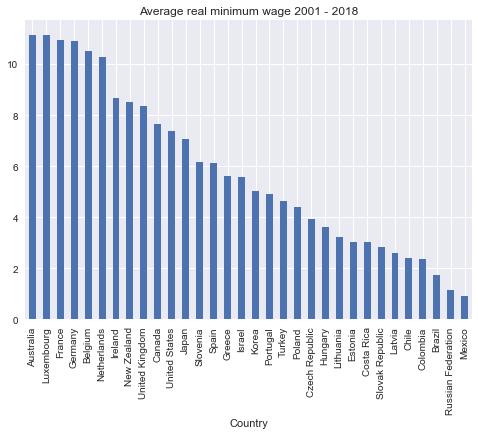

In [26]:
merged.mean().sort_values(ascending=False).plot(kind='bar', title="Average real minimum wage 2001 - 2018")

#Set country labels
country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

Passing in axis=1 to `.mean()` will aggregate over columns (giving the average minimum wage for all countries over time)

In [27]:
merged.mean(axis=1).head()

2001   4.79
2002   4.89
2003   4.98
2004   5.10
2005   5.21
dtype: float64

We can plot this time series as a line graph

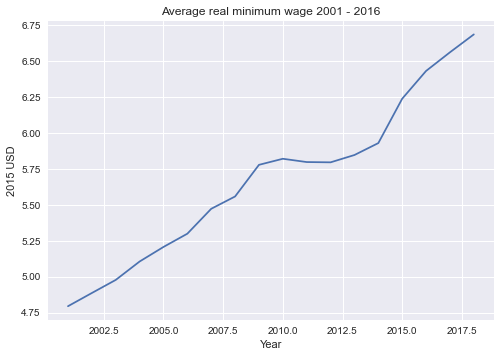

In [28]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2001 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

We can also specify a level of the MultiIndex (in the column axis) to aggregate over

In [29]:
merged.mean(level='Continent', axis=1).head()

Continent,Americas,Asia,Australia,Europe
2001,3.29,4.42,8.62,5.04
2002,3.28,4.52,8.70,5.17
2003,3.25,4.64,8.90,5.29
2004,3.24,4.96,9.12,5.41
2005,3.24,5.09,9.26,5.55


We can plot the average minimum wages in each continent as a time series

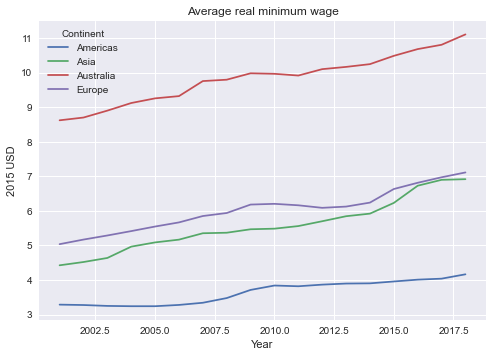

In [30]:
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

`.describe()` is useful for quickly retrieving a number of common summary statistics

In [31]:
merged.stack().describe()

Continent,Americas,Asia,Australia,Europe
count,126.00,71.00,36.00,328.00
mean,3.64,5.55,9.83,6.03
std,2.57,1.26,1.56,3.24
min,0.90,2.90,6.78,0.25
25%,2.01,4.71,8.81,3.30
50%,2.54,5.40,10.27,5.20
75%,6.67,6.49,11.12,9.22
max,9.52,8.08,12.14,11.88


Calling an aggregation method on the object applies the function to each group, the results of which are combined in a new data structure.

For example, we can return the number of countries in our dataset for each continent using `.size()`.

In this case, our new data structure is a Series